# Práctica 3: Regresión logística multi-clase y redes neuronales
#### Realizado por Javier Gómez Moraleda y Unai Piris Ibañez

## Parte 1 - Regresión logística multi-clase 

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.io import loadmat
from sklearn.preprocessing import PolynomialFeatures

### Visualización de los datos

In [2]:
# Carga del fichero
data = loadmat ('ex3data1.mat')
# Se pueden consultar las claves con data.keys()

# Almacenamos los datos leídos en X, y
X = data ['X'] # X es una matriz de 5000x400 donde cada fila representa una imagen de 20x20 píxeles
y = data ['y'] # y es un vector de 5000x1 componentes con las etiquetas de los ejemplos de entrenamiento

(-0.5, 199.5, 19.5, -0.5)

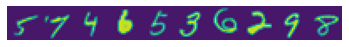

In [3]:
#Selecciona aleatoriamente 10 ejemplos y los pinta
sample = np.random.choice(X.shape[0], 10)
plt.imshow(X[sample, :].reshape( -1, 20).T)
plt.axis('off')

### Clasificación de uno frente a todos

In [4]:
# Calcula el valor de la función sigmoide
def sigmoid(X):
    z = 1/(1 + np.exp(-X))
    return z

In [5]:
# Calcula la función de coste regularizada
def fun_coste_reg(thetas, X, Y, lam):
    H = sigmoid(np.dot(X, thetas))
    m = len(Y)
    Term1 = np.matmul(Y, np.log(H))
    Term2 = np.matmul((1 - Y), np.log(1 - H))
    cost = (- np.sum(Term1 + Term2) / m)  + (lam / (2*m)) * np.sum(np.square(thetas))
    
    return cost

In [6]:
# Calcula el gradiente
def gradient_reg(thetas, X, Y, lam):
    H = sigmoid(np.dot(X, thetas))
    m = len(Y)
    Dif = H - Y
    grad = (np.matmul(Dif, X) / m)  + (lam / m) * thetas

    return grad

In [7]:
# Clasificador
def oneVsAll(X, y, num_etiquetas, reg):
    
    ''' oneVsAll entrena varios clasificadores por regresión logística con término
    de regularización 'reg' y devuelve el resultado en una matriz, donde
    la fila i−ésima corresponde al clasificador de la etiqueta i−ésima '''
    
    # Número de columnas y filas
    n = X.shape[1] # 400
    m = len(y) # 5000
    
    # Predicciones de 0 a 9
    y = (y - 1)
    
    # Matriz de m ejemplos x num_etiquetas columnas
    y_onehot = np.zeros((m, num_etiquetas))
    
    # Le asigno el valor 1 si pertenece a la clase i-ésima
    for i in range(m):
        y_onehot[i][y[i]] = 1
    
    all_thetas = np.zeros((num_etiquetas, n))
    
    # Bucle principal
    for c in range(num_etiquetas):
        theta_inicial = np.zeros(n)
        result = opt.fmin_tnc(func=fun_coste_reg, x0=theta_inicial, fprime=gradient_reg, args=(X, y_onehot[:, c], reg))
        all_thetas[c] = result[0]
        
    return all_thetas

In [8]:
# Calcula la predicción de un ejemplo (1 fila) aplicandole la función sigmoide en función de thetas
def prediccion(ejemplo, all_thetas):
    resul = sigmoid(np.dot(all_thetas, ejemplo))
    return np.argmax(resul) + 1

In [9]:
# Calcula las predicciones y las compara con las clases originales, después calcula el porcentaje de aciertos
def calcula_precision(X, y, all_thetas):
    predicciones = []
    for ejemplo in X:
        predicciones.append(prediccion(ejemplo, all_thetas))
    
    precision = np.mean(predicciones == y.ravel())
    print("Porcentaje de aciertos: ", precision * 100, "%")
    return predicciones

### Analizando resultados

In [10]:
all_thetas = oneVsAll(X, y, 10, 0.1)

In [11]:
predicciones = calcula_precision(X, y, all_thetas)

Porcentaje de aciertos:  95.88 %


Observando los resultados, obtenemos un porcentaje de aciertos bastante alto. Si comprobamos el array de predicciones, como en y los ejemplos estan ordenados (500 primeros del 0, 500 siguientes del 1...), vemos claramente en que ejemplos se confunde el clasificador. Posiblemente si analizamos dichos ejemplos, nos costará saber que número es hasta a nosotros, por lo que consideramos que hace bien su trabajo.

## Parte 2 - Redes neuronales 

### Carga de los datos

In [12]:
# Carga de los datos
weights = loadmat ( 'ex3weights.mat')
theta1, theta2 = weights['Theta1'], weights['Theta2']
all_thetas = weights['Theta1'], weights['Theta2']

In [17]:
# Carga del fichero
data = loadmat ('ex3data1.mat')

# Almacenamos los datos leídos en X, y
X = data ['X'] # X es una matriz de 5000x400 donde cada fila representa una imagen de 20x20 píxeles
y = data ['y'] # y es un vector de 5000x1 componentes con las etiquetas de los ejemplos de entrenamiento

### Propagación hacia delante

In [18]:
# Propagación hacia delante
def forward_propagation(Theta1, Theta2, X):
    m = X.shape[0]

    # Input Layer
    a1 = np.hstack([np.ones([m, 1]), X])
    # Hidden Layer
    z2 = np.matmul(a1, Theta1.T)
    a2 = np.hstack([np.ones([m, 1]), sigmoid(z2)])
    # Output Layer
    z3 = np.matmul(a2, Theta2.T)
    a3 = sigmoid(z3)
    
    return a3

In [19]:
# Calcula las predicciones y las compara con las clases originales, después calcula el porcentaje de aciertos
def calcula_precision(result, y):
    predicciones = []
    for i in range(len(result)):
        predicciones.append(np.argmax(result[i])+1)
            
    precision = np.mean(predicciones == y.ravel())
    print("Porcentaje de aciertos: ", precision * 100, "%")
    return predicciones

### Observando resultados

In [20]:
result = forward_propagation(all_thetas[0], all_thetas[1], X)

In [21]:
predicciones = calcula_precision(result, y)

Porcentaje de aciertos:  97.52 %


Con las redes neuronales obtenemos un mayor porcentaje de aciertos.